In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 분류 문제 성능 평가 라이브러리
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# 회귀 문제 성능 평가 라이브러리
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# 군집 문제 성능 평가 라이브러리
from sklearn.metrics import silhouette_score

지도 학습(Supervised Learning)에서는 라벨링된 데이터를 이용해서 모델을 생성한다. 주어진 데이터 셋에 라벨링이 되어있다면 학습 및 분류를 시키기 좋지만 실제 데이터를 다루다 보면 라벨링이 되어있지 않은 경우도 많이 접한다. 비지도 학습(Unsupervised Learning)은 라벨링이 되어있지 않은 데이터를 이용하는 학습 방법이다.

비지도 학습에 사용하는 데이터는 라벨링이 되어있지 않으므로 레이블 없이 피쳐 데이터만 활용해서 데이터를 학습시킨다. 지도 학습에서는 데이터를 분류하는 것을 Classification라고 했지만, 비지도 학습에서는 데이터를 분류하는 것을 Clustering이라고 한다.

k평균 클러스터링(KMeans Clustering)

k평균 클러스터링은 n개의 데이터를 k개의 클러스터로 나누는 클러스터링 기법이다. k평균 클러스터링은 각 데이터 포인트와 각 그룹의 평균(중심)간의 거리를 구한 후 가장 가까운 클러스터로 배정하는 방법이다.

k평균 클러스터링에서는 거리라는 개념이 사용되고 여기서는 유클리드 거리(Euclidean Distance)를 사용한다. 데이터 포인트 x와 데이터 포인트 y 사이의 유클리드 거리는 아래와 같은 공식을 사용한다.

$$d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$

k평균 클러스터링 알고리즘  
① 그룹 평균 초기화: k평균 클러스터링 알고리즘의 첫 과정은 각 그룹의 평균을 초기화하는 것인데, 이때 사용하는 가장 기본적인 방법은 랜덤으로 평균을 설정하는 것이다.  
② 그룹 할당: 각 데이터 포인트와 가장 가까운 그룹 평균에 해당되는 그룹에 할당한다. 즉, 각 데이터 포인트와 각 그룹의 평균까지의 거리를 계산해서 가장 가까운 그룹으로 속하게 만드는 것이다.  
③ 평균 업데이트: 위 ② 단계를 거치면 모든 데이터 포인트가 어떤 그룹에 속하는지 알 수 있다. 그 후 각 그룹에 대한 새로운 평균값을 구한다.  
④ 반복: ② 단계에서 바뀌는 값이 없을 때 까지 ② ~ ③ 단계를 반복한다.

k평균 클러스터링은 사용하기 쉽다는 장점이 있지만 k평균 클러스터링에서는 가중를 주지않아 클러스터간 데이터의 밀도 차이가 있을 경우 클러스터링이 잘되지 않는 단점이 있다. 그리고 k평균 클러스터링은 모양을 고려하지 않으며, 초기 k값을 사용자가 정해야 한다는 단점이 존재한다.

k평균 클러스터링 알고리즘을 활용해서 주어진 데이터를 클러스터링 해본다.

데이터 불러오기

In [2]:
# make_blobs() 메소드로 사이킷런이 제공하는 모든 방향을 같은 성질을 가지는 등방성 가우시안 정규 분포를
# 따르는 데이터를 랜덤으로 불러온다.
# n_samples 속성의 기본값은 100이고 랜덤으로 불러올 데이터의 개수를 지정한다.
# n_features 속성의 기본값은 2이고 데이터당 피쳐의 개수를 지정한다.
# random_state 속성값을 지정하면 매번 같은 배열의 데이터를 불러온다.
# centers 속성의 기본값은 3이고 클러스터의 개수를 설정해서 클러스터링용 가상 데이터를 만든다.
x_train, y_train = datasets.make_blobs(n_samples=100, n_features=2, random_state=10, centers=6)
print(x_train.shape, y_train.shape)
for i in range(len(x_train))[:5]:
    print(x_train[i], y_train[i])

(100, 2) (100,)
[-6.08678403  4.7298269 ] 3
[3.80174985 4.27826762] 1
[-7.33058271 -8.4940632 ] 4
[-6.10706886 -7.81890608] 4
[ 5.52556208 -8.18696464] 0


클러스터링 되지 않은 데이터 시각화

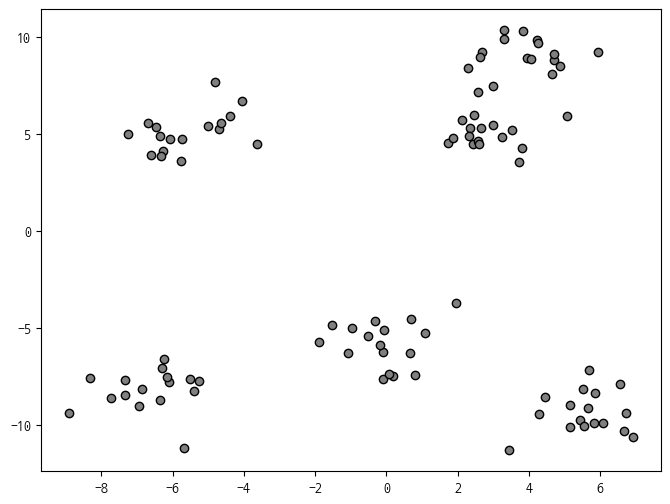

In [3]:
plt.figure(figsize=[8, 6])
plt.scatter(x_train[:, 0], x_train[:, 1], c='gray', edgecolors='black', marker='o')
plt.show()

k평균 클러스터링 모델 생성 후 데이터 학습

In [4]:
from sklearn.cluster import KMeans # k평균 클러스터링 알고리즘을 사용하기 위해 import 한다.
# n_clusters 속성에 클러스터링 개수를 지정해서 k평균 클러스터링 모델을 만든다. 기본값은 8이다.
# init 속성은 첫 번째 중심값을 선정하는 방법을 지정한다. 기본값은 'k-means++'이다.
# 'k-means++'은 샘플링 단계에서 여러 번 시도하고 그 중에서 가장 좋은 중심을 선택하고 'random'은
# 랜덤하게 중심을 선택한다.
# max_iter 속성은 클러스터링을 실행하는 최대 반복 횟수를 지정한다. 기본 300이다.
cluster = KMeans(n_clusters=6, init='random', max_iter=100, random_state=0)
# 학습 데이터로 k평균 클러스터링 모델을 학습시킨다.
cluster.fit(x_train)

KMeans(init='random', max_iter=100, n_clusters=6, random_state=0)

In [5]:
# 클러스터링 결과(레이블)를 확인한다.
# labels_ 속성으로 클러스터링 결과를 확인할 수 있다.
print(cluster.labels_)
# predict() 메소드에 피쳐 데이터를 넘겨서 클러스터링 결과를 확인할 수 있다.
print(cluster.predict(x_train))

[2 5 4 4 0 4 1 1 0 2 3 4 0 2 0 4 5 1 0 1 1 4 2 4 4 4 2 3 0 1 1 2 2 0 2 2 5
 5 2 3 1 1 3 1 0 3 3 2 0 5 0 5 0 2 3 0 0 2 5 1 4 5 5 1 2 4 5 5 5 0 3 3 4 1
 0 4 2 2 3 1 2 4 4 0 0 3 1 5 3 1 3 1 3 5 3 4 5 5 5 3]
[2 5 4 4 0 4 1 1 0 2 3 4 0 2 0 4 5 1 0 1 1 4 2 4 4 4 2 3 0 1 1 2 2 0 2 2 5
 5 2 3 1 1 3 1 0 3 3 2 0 5 0 5 0 2 3 0 0 2 5 1 4 5 5 1 2 4 5 5 5 0 3 3 4 1
 0 4 2 2 3 1 2 4 4 0 0 3 1 5 3 1 3 1 3 5 3 4 5 5 5 3]


k평균 클러스터링 알고리즘으로 클러스터링된 데이터 시각화

In [6]:
# 클러스터링된 데이터 시각화를 위해 데이터프레임을 만든다.
x_train_df = pd.DataFrame(x_train, columns=['x', 'y'])
x_train_df['label'] = y_train
x_train_df['cluster'] = cluster.labels_ # 데이터프레임에 클러스터링된 레이블을 넣어준다.
x_train_df

,x,y,label,cluster
0,-6.086784,4.729827,3,2
1,3.801750,4.278268,1,5
2,-7.330583,-8.494063,4,4
3,-6.107069,-7.818906,4,4
4,5.525562,-8.186965,0,0
...,...,...,...,...
95,-6.950884,-9.024594,4,4
96,2.591843,4.446782,1,5
97,2.992321,5.436981,1,5
98,2.310466,4.854172,1,5


In [7]:
# 레이블과 클러스터링된 레이블의 종류 확인
print(set(x_train_df.label), set(x_train_df.cluster))

{0, 1, 2, 3, 4, 5} {0, 1, 2, 3, 4, 5}


실제 데이터 레이블 시각화

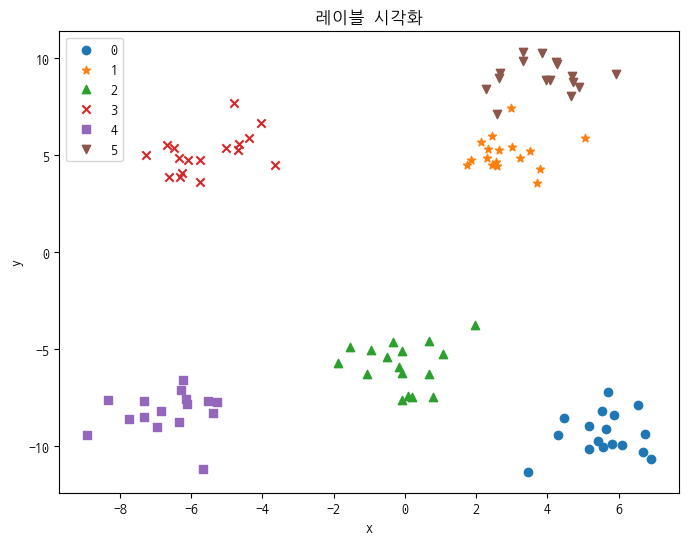

In [8]:
plt.figure(figsize=(8, 6))
markers = ['o', '*', '^', 'x', 's', 'v']

for i in set(x_train_df.label):
    df_index = x_train_df[x_train_df.label == i] # 데이터의 레이블 별로 데이터를 분할한다.
    x = df_index.x # 학습 데이터의 첫 번째 성분 벡터를 추출한다.
    y = df_index.y # 학습 데이터의 두 번째 성분 벡터를 추출한다.
    plt.scatter(x=x, y=y, marker=markers[i], label=i) # 산포도를 그린다.

plt.title('레이블 시각화')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

k평균 클러스터링 결과 시각화

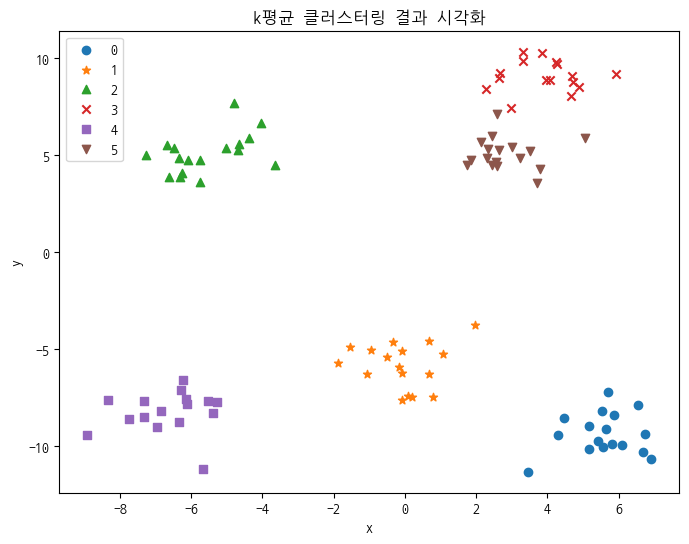

In [9]:
plt.figure(figsize=(8, 6))
markers = ['o', '*', '^', 'x', 's', 'v']

for i in set(x_train_df.cluster):
    df_index = x_train_df[x_train_df.cluster == i] # 클러스터링 결과 별로 데이터를 분할한다.
    x = df_index.x # 학습 데이터의 첫 번째 성분 벡터를 추출한다.
    y = df_index.y # 학습 데이터의 두 번째 성분 벡터를 추출한다.
    plt.scatter(x=x, y=y, marker=markers[i], label=i) # 산포도를 그린다.

plt.title('k평균 클러스터링 결과 시각화')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

학습된 모델을 평가한다.

In [10]:
# 실루엣 스코어(Silhouette Score)는 서로 다른 군집이 얼마나 잘 분리되어 있는지를 나타내는
# 지표로 군집 문제에서의 모델 성능을 평가한다.
# 실루엣 스코어는 -1부터 1 사이의 값을 가지며 점수가 높을수록 좋은 성능을 의미한다.
# silhouette_score() 메소드에 피쳐 데이터와 군집화 결과로 얻은 클러스터를 넘겨 실루엣 스코어를 평가한다.
sil_score = silhouette_score(x_train, cluster.labels_)
print(sil_score)

0.7004453149145585
